# Weekly project part 1
    Using the image "appletree.jpg"
    A) Can you segment the apples from the tree?
    B) Can you get the computer to count how many there are? 
        How close can you get there are 26.
    C) Can you change color of one of them?
    D) Can you segment the leaves?
    
    
# Weekly project part 2
    A) Remove the greenscreen and replace the background in "itssp.png"?
    B) Can improve the edge with erroding/dialating?


import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils 

In [35]:
# Weekly project part 1
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils 

In [36]:
bgr_img = cv2.imread("appletree.jpg")
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))

width=1600, height=1200, depth=3


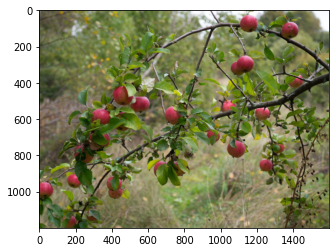

In [37]:
plt.imshow(image)

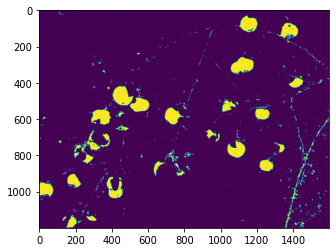

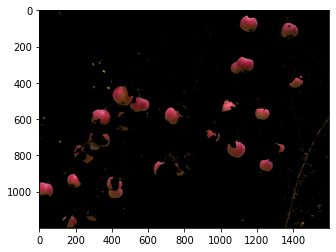

In [57]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

upper = np.array([180,255,255])
lower = np.array([100,118,0])
mask_basic = cv2.inRange(hsv, lower, upper)

result = cv2.bitwise_and(image, image, mask=mask_basic)

plt.imshow(mask_basic)
plt.figure()
plt.imshow(result)

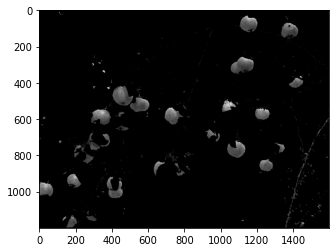

In [51]:
gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

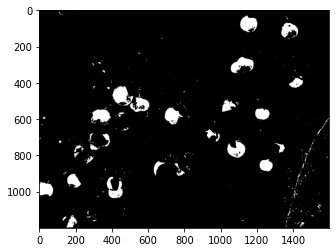

In [63]:
threshold = 50
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY)[1]

plt.imshow(thresh, cmap='gray')

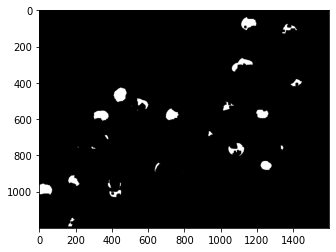

In [67]:
erode = cv2.erode(thresh, None, iterations = 5)
plt.imshow(erode, cmap = 'gray')

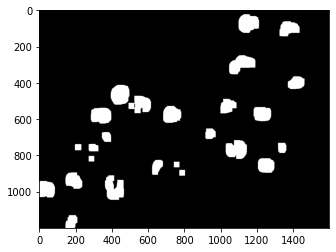

In [74]:
dilated = erode.copy()
dilated = cv2.dilate(dilated, None, iterations = 15)
cnts = cv2.findContours(dilated.copy(), cv2.RETR_LIST , cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

plt.imshow(dilated, cmap='gray')

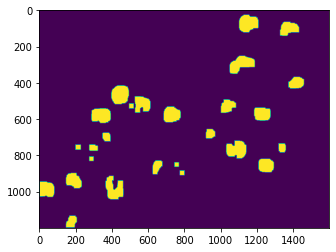

In [75]:
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(dilated, [c], -1, (0, 0, 0), 3)
    
plt.imshow(dilated)

I found 26 objects!


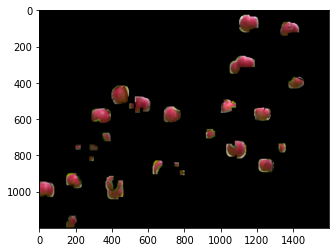

In [80]:
#B)
text = "I found {} objects!".format(len(cnts))
print(text)

result = cv2.bitwise_and(image, image, mask=dilated)
plt.imshow(result)

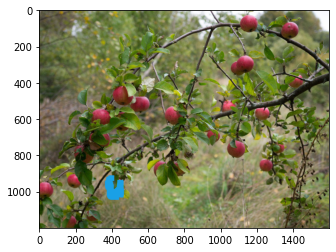

In [82]:
#C
excercise_image = image.copy()

#mask = np.ones(excercise_image.shape[:2], dtype="uint8") * 255
cv2.drawContours(excercise_image, [cnts[2]], -1, (25, 160, 230), -1)
plt.imshow(excercise_image)

In [ ]:
# D) Can you segment the leaves?
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

upper = np.array([96,255,255])
lower = np.array([36,120,0])
mask_basic = cv2.inRange(hsv, lower, upper)

result = cv2.bitwise_and(image, image, mask=mask_basic)

plt.imshow(mask_basic)
plt.figure()
plt.imshow(result)

## Weekly project part 2¶
A) Remove the greenscreen and replace the background in "itssp.png"?

B) Can improve the edge with erroding/dialating?

width=1280, height=720, depth=3


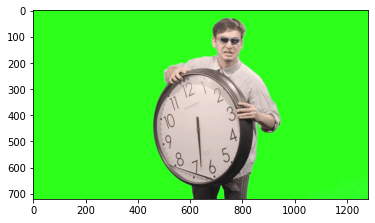

In [89]:
bgr_img = cv2.imread("ittsp.png")
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))
plt.imshow(image)

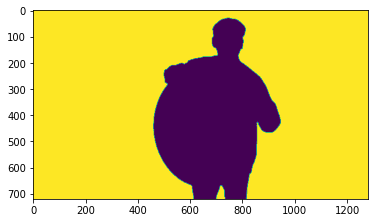

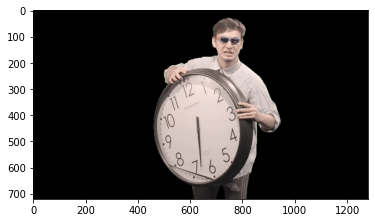

In [109]:
# D) Can you segment the leaves?
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

upper = np.array([96,255,255])
lower = np.array([30,80,0])
mask_basic = cv2.inRange(hsv, lower, upper)

result = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask_basic))

plt.imshow(mask_basic)
plt.figure()
plt.imshow(result)